# Session 6

1. Séries temporelles
2. Graphiques avec **pandas**
3. Graphiques avec **matplotlib**
4. Graphiques avec **seaborn**
5. Cartes : **matplotlib**, **plotly** et **ipyleaflet**

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Séries temporelles

Le module datetime :
- **date**: date (year, month, day) calendrier Grégorien
- **time**: temps (hours, minutes, seconds, microseconds)
- **datetime**: timestamp (date + time)
- **timedelta**: durée, différence entre 2 dates ou 2 temps (days, hours, minutes, seconds, microseconds)
- **tzinfo**: gestion des fuseaux horaires (time zones)

Voir : https://docs.python.org/fr/3.7/library/datetime.html

In [2]:
# import
import datetime

### 1.1 Objets temporels

In [3]:
# date
today = datetime.date.today()
today

datetime.date(2022, 10, 21)

In [4]:
# datetime
now = datetime.datetime.now()
now

datetime.datetime(2022, 10, 21, 9, 8, 3, 661850)

In [5]:
# UTC datetime
now_utc = datetime.datetime.utcnow()
now_utc

datetime.datetime(2022, 10, 21, 7, 8, 3, 681850)

In [6]:
# timedelta
today - datetime.date(2022, 1, 1)

datetime.timedelta(days=293)

In [7]:
# addition entre une date et un timedelta
now + datetime.timedelta(days=100)

datetime.datetime(2023, 1, 29, 9, 8, 3, 661850)

In [8]:
# différence entre une date et un timedelta
now - datetime.timedelta(days=100)

datetime.datetime(2022, 7, 13, 9, 8, 3, 661850)

In [9]:
# import pytz
from pytz import timezone

In [10]:
# build a timezone object
tz = timezone('Asia/Shanghai')
tz

<DstTzInfo 'Asia/Shanghai' LMT+8:06:00 STD>

In [11]:
# convertion d'un datetime selon un fuseau horaire
now.astimezone(tz)

datetime.datetime(2022, 10, 21, 15, 8, 3, 661850, tzinfo=<DstTzInfo 'Asia/Shanghai' CST+8:00:00 STD>)

### 1.2 Ecriture et lecture

- `strftime()` : **F**ormater un datetime selon un format donné
- `strptime()` : **P**arser un datetime selon un format donné

Directives | Comments
- | -
%a | Day of the week abbreviated
%A | Day of the week
%w | Day of the week 0 = Sunday ... 6 = Saturday
%d | Day of month on 2 digits 01, 02, ..., 31
%j | Day of year on 3 digits 001, 002, ..., 366
%b | Month abbreviated
%B | Month name
%m | Month on 2 digits 01, 02, ..., 12
%U | Number of week in year (Sunday = first day)
%W | Number of week in year (Monday = first day)
%y | Year without the century on 2 digits 00, 01, ..., 99	 
%Y | Year with the century on 4 digits 0001, 0002, ..., 2018, 2019, ..., 9998, 9999
%H | Hour over 24 00, 01, ..., 23
%I | Hour over 12 01, 02, ..., 12
%p | AM or PM
%M | Minute on 2 digits 00, 01, ..., 59
%S | Second on 2 digits 00, 01, ..., 59
%f | Microsecond on 6 digits 000000, 000001, ..., 999999
%z | UTC offset +HHMM or -HHMM
%Z | Time zone 
%c | Representation date and temps
%x | Representation date
%X | Representation time
%% | Character %

In [12]:
# datetime
now = datetime.datetime.now()
now

datetime.datetime(2022, 10, 21, 9, 8, 4, 201850)

In [13]:
# jour dela semaine
now.strftime("%A %d/%m/%Y")

'Friday 21/10/2022'

In [14]:
# locale
# mettre parfois fr_FR ou fr_FR.UTF-8 au lieu de fr, etc.
import locale
#locale.setlocale(locale.LC_ALL, 'am') # armenian
#locale.setlocale(locale.LC_ALL, 'ar') # arabic
#locale.setlocale(locale.LC_ALL, 'az') # azeri
#locale.setlocale(locale.LC_ALL, 'bn') # bengali
#locale.setlocale(locale.LC_ALL, 'da') # danish
#locale.setlocale(locale.LC_ALL, 'de') # german
#locale.setlocale(locale.LC_ALL, 'es') # spanish
#locale.setlocale(locale.LC_ALL, 'en') # english
#locale.setlocale(locale.LC_ALL, 'fa') # farsi
locale.setlocale(locale.LC_ALL, 'fr_FR.utf8') # french
#locale.setlocale(locale.LC_ALL, 'ga') # gaelic
#locale.setlocale(locale.LC_ALL, 'hi') # hindi
#locale.setlocale(locale.LC_ALL, 'he') # hebrew
#locale.setlocale(locale.LC_ALL, 'hr') # croatian
#locale.setlocale(locale.LC_ALL, 'ig') # igbo
#locale.setlocale(locale.LC_ALL, 'it') # italian
#locale.setlocale(locale.LC_ALL, 'ja') # japanese
#locale.setlocale(locale.LC_ALL, 'lt') # lithuanian 
#locale.setlocale(locale.LC_ALL, 'ko') # korean
#locale.setlocale(locale.LC_ALL, 'nl') # dutch
#locale.setlocale(locale.LC_ALL, 'no') # norvegian
#locale.setlocale(locale.LC_ALL, 'pt') # portugese
#locale.setlocale(locale.LC_ALL, 'ro') # romanian
#locale.setlocale(locale.LC_ALL, 'ru') # russian
#locale.setlocale(locale.LC_ALL, 'sq') # albanian
#locale.setlocale(locale.LC_ALL, 'sr') # serbian
#locale.setlocale(locale.LC_ALL, 'th') # thai
#locale.setlocale(locale.LC_ALL, 'tr') # turkish
#locale.setlocale(locale.LC_ALL, 'uk_UA') # ukrainian
#locale.setlocale(locale.LC_ALL, 'vi') # vietnamian
#locale.setlocale(locale.LC_ALL, 'zh') # chinese
now.strftime("%A %B %d/%m/%Y")

'vendredi octobre 21/10/2022'

In [15]:
# lecture au format : AA-MM-DD-HH-MM
# écriture au format : HH:MM DD/MM/YYYY
var = datetime.datetime.strptime("20-11-04-10-30", "%y-%m-%d-%H-%M")
var.strftime("%H:%M %d/%m/%Y")

'10:30 04/11/2020'

**Exercice n° 1**


- Prendre le DataFrame des villes 'cities500.txt', combien a-t-on de fuseaux horaires ?
- Remplacez les valeurs de la colonne "timezone" par des objets "timezone".
- Prenez le datetime courant (now), convertissez-le avec toutes les valeurs de la colonne "timezone", et produisez des chaines de caractères au format format: `'%Y-%m-%d %H:%M:%S'`
- Il y a 24 heures dans une journée, combien obtient-on de fuseaux horaires différents ?

In [3]:
df = pd.read_csv('cities500.txt',
                 sep='\t',
                 header=None,
                 keep_default_na=False,  # NA = North America
                 na_values=['', -9999],
                 names=['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 
                        'longitude', 'feature class', 'feature code', 'country code', 
                        'cc2', 'admin1 code', 'admin2 code', 'admin3 code', 'admin4 code', 
                        'population', 'elevation', 'dem', 'timezone', 'modification date'],
                dtype={'admin1 code': str,
                       'admin2 code': str,
                       'admin3 code': str,
                       'admin4 code': str})
df.head()

geonameid                 name            asciiname  \
0    3038999               Soldeu               Soldeu   
1    3039154            El Tarter            El Tarter   
2    3039163  Sant Julià de Lòria  Sant Julia de Loria   
3    3039604       Pas de la Casa       Pas de la Casa   
4    3039678               Ordino               Ordino   

                                      alternatenames  latitude  longitude  \
0                                                NaN  42.57688    1.66769   
1                               Ehl Tarter,Эл Тартер  42.57952    1.65362   
2  San Julia,San Julià,Sant Julia de Loria,Sant J...  42.46372    1.49129   
3                      Pas de la Kasa,Пас де ла Каса  42.54277    1.73361   
4  Ordino,ao er di nuo,orudino jiao qu,Ордино,オルデ...  42.55623    1.53319   

  feature class feature code country code  cc2 admin1 code admin2 code  \
0             P          PPL           AD  NaN          02         NaN   
1             P          PPL           AD  NaN          02         NaN   
2             P         PPLA           AD  NaN          06         NaN   
3             P          PPL           AD  NaN          03         NaN   
4             P         PPLA           AD  NaN          05         NaN   

  admin3 code admin4 code  population  elevation     dem        timezone  \
0         NaN         NaN         602        NaN  1832.0  Europe/Andorra   
1         NaN         NaN        1052        NaN  1721.0  Europe/Andorra   
2         NaN         NaN        8022        NaN   921.0  Europe/Andorra   
3         NaN         NaN        2363     2050.0  2106.0  Europe/Andorra   
4         NaN         NaN        3066        NaN  1296.0  Europe/Andorra   

  modification date  
0        2017-11-06  
1        2012-11-03  
2        2013-11-23  
3        2008-06-09  
4        2018-10-26

In [17]:
df["timezone"].nunique()

401

In [18]:
df["timezone"].apply(timezone)

0         Europe/Andorra
1         Europe/Andorra
2         Europe/Andorra
3         Europe/Andorra
4         Europe/Andorra
               ...      
196571     Africa/Harare
196572     Africa/Harare
196573     Africa/Harare
196574     Africa/Harare
196575     Africa/Harare
Name: timezone, Length: 196576, dtype: object

In [19]:
now = datetime.datetime.now()
now

datetime.datetime(2022, 10, 21, 9, 8, 6, 233857)

In [20]:
tz = df["timezone"].apply(timezone).iloc[0]
tz

<DstTzInfo 'Europe/Andorra' LMT+0:06:00 STD>

In [ ]:
#now.astimezone(df["timezone"].apply(timezone).iloc[0])

In [1]:
#df["timezone"].apply(timezone).apply(now.astimezone).apply(lambda ts: ts.strftime('%Y-%m-%d %H:%M:%S')).nunique()

NameError: name 'df' is not defined

### 1.3 Séries temporelles

In [4]:
def df_taux_change(devises):
    df = pd.read_csv("Webstat_Export.csv",
                     sep=";",
                     na_values='-',
                     decimal=',',
                     skiprows=[0, 1, 3, 4, 5],  # le skiprows permet à l'option "decimal" de fonctionner
                     converters={0: lambda x: pd.to_datetime(x, format='%d/%m/%Y', errors='ignore')})

    # extraction des codes monnaies
    cols = pd.Series(df.columns.tolist()).str.extract('\(([A-Z]{3})\)', expand=True)
    cols.iloc[0] = 'Date'
    df.columns = cols[0]

    # selection des devises
    df = df[['Date'] + devises]

    # drop na
    df = df.dropna()

    # set and sort index
    df = df.set_index('Date')
    df = df.sort_index()
    
    return df

In [5]:
df = df_taux_change(['USD', 'CHF', 'GBP', 'JPY', 'RUB', 'CNY'])
df.head()

0              USD     CHF     GBP     JPY      RUB     CNY
Date                                                       
2000-01-13  1.0276  1.6111  0.6255  108.89  29.4837  8.5054
2000-01-14  1.0225  1.6130  0.6221  108.05  29.2350  8.4632
2000-01-17  1.0094  1.6136  0.6180  105.81  28.9738  8.3548
2000-01-18  1.0093  1.6131  0.6174  106.42  28.8510  8.3540
2000-01-19  1.0105  1.6120  0.6172  106.99  28.8815  8.3639

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5665 entries, 2000-01-13 to 2022-03-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USD     5665 non-null   float64
 1   CHF     5665 non-null   float64
 2   GBP     5665 non-null   float64
 3   JPY     5665 non-null   float64
 4   RUB     5665 non-null   float64
 5   CNY     5665 non-null   float64
dtypes: float64(6)
memory usage: 309.8 KB


**L'accesseur dt**

In [7]:
# reset_index
df = df.reset_index()
df.head()

0       Date     USD     CHF     GBP     JPY      RUB     CNY
0 2000-01-13  1.0276  1.6111  0.6255  108.89  29.4837  8.5054
1 2000-01-14  1.0225  1.6130  0.6221  108.05  29.2350  8.4632
2 2000-01-17  1.0094  1.6136  0.6180  105.81  28.9738  8.3548
3 2000-01-18  1.0093  1.6131  0.6174  106.42  28.8510  8.3540
4 2000-01-19  1.0105  1.6120  0.6172  106.99  28.8815  8.3639

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665 entries, 0 to 5664
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5665 non-null   datetime64[ns]
 1   USD     5665 non-null   float64       
 2   CHF     5665 non-null   float64       
 3   GBP     5665 non-null   float64       
 4   JPY     5665 non-null   float64       
 5   RUB     5665 non-null   float64       
 6   CNY     5665 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 309.9 KB


In [9]:
# access to year
df['Date'].dt.year

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
5660    2022
5661    2022
5662    2022
5663    2022
5664    2022
Name: Date, Length: 5665, dtype: int64

In [10]:
# access to month
df['Date'].dt.month

0       1
1       1
2       1
3       1
4       1
       ..
5660    2
5661    2
5662    2
5663    2
5664    3
Name: Date, Length: 5665, dtype: int64

In [11]:
# access to week days
df['Date'].dt.weekday

0       3
1       4
2       0
3       1
4       2
       ..
5660    2
5661    3
5662    4
5663    0
5664    1
Name: Date, Length: 5665, dtype: int64

**Sélection de données temporelles**

In [12]:
# setting the index as a datetime object
df = df.set_index('Date')
df = df.sort_index()
df

0              USD     CHF      GBP     JPY       RUB     CNY
Date                                                         
2000-01-13  1.0276  1.6111  0.62550  108.89   29.4837  8.5054
2000-01-14  1.0225  1.6130  0.62210  108.05   29.2350  8.4632
2000-01-17  1.0094  1.6136  0.61800  105.81   28.9738  8.3548
2000-01-18  1.0093  1.6131  0.61740  106.42   28.8510  8.3540
2000-01-19  1.0105  1.6120  0.61720  106.99   28.8815  8.3639
...            ...     ...      ...     ...       ...     ...
2022-02-23  1.1344  1.0431  0.83463  130.58   90.8791  7.1669
2022-02-24  1.1163  1.0320  0.83463  128.28   95.7175  7.0601
2022-02-25  1.1216  1.0398  0.83740  129.64   92.5673  7.0828
2022-02-28  1.1199  1.0336  0.83550  129.31  115.4842  7.0670
2022-03-01  1.1162  1.0247  0.83290  128.15  117.2010  7.0462

[5665 rows x 6 columns]

In [13]:
# yearly data
df.loc['2021']

0              USD     CHF      GBP     JPY      RUB     CNY
Date                                                        
2021-01-04  1.2296  1.0811  0.90160  126.62  90.3420  7.9484
2021-01-05  1.2271  1.0803  0.90333  126.25  91.6715  7.9315
2021-01-06  1.2338  1.0821  0.90635  127.03  90.8175  7.9653
2021-01-07  1.2276  1.0833  0.90190  127.13  91.2000  7.9392
2021-01-08  1.2250  1.0827  0.90128  127.26  90.8000  7.9184
...            ...     ...      ...     ...      ...     ...
2021-12-27  1.1312  1.0396  0.84330  129.79  83.2088  7.2087
2021-12-28  1.1331  1.0381  0.84248  130.16  83.4446  7.2159
2021-12-29  1.1303  1.0380  0.84115  129.97  83.5863  7.1994
2021-12-30  1.1334  1.0363  0.83930  130.44  84.8888  7.2230
2021-12-31  1.1326  1.0331  0.84028  130.38  85.3004  7.1947

[258 rows x 6 columns]

In [14]:
# monthly data
df.loc['2020/01'] # or df.loc['01/2020']

0              USD     CHF      GBP     JPY      RUB     CNY
Date                                                        
2020-01-02  1.1193  1.0865  0.84828  121.75  69.1893  7.7946
2020-01-03  1.1147  1.0840  0.85115  120.54  69.1190  7.7712
2020-01-06  1.1194  1.0850  0.85215  121.02  69.4047  7.8049
2020-01-07  1.1172  1.0850  0.85183  121.15  69.2576  7.7562
2020-01-08  1.1115  1.0792  0.84868  120.86  68.6389  7.7184
2020-01-09  1.1110  1.0808  0.85285  121.54  68.0757  7.7011
2020-01-10  1.1091  1.0822  0.84810  121.60  68.0410  7.6773
2020-01-13  1.1126  1.0811  0.85760  122.25  68.0893  7.6697
2020-01-14  1.1115  1.0767  0.85618  122.32  68.2418  7.6536
2020-01-15  1.1142  1.0751  0.85683  122.43  68.4386  7.6746
2020-01-16  1.1169  1.0739  0.85470  122.80  68.8102  7.6837
2020-01-17  1.1108  1.0736  0.85105  122.31  68.2495  7.6186
2020-01-20  1.1085  1.0737  0.85275  122.14  68.2075  7.6112
2020-01-21  1.1115  1.0743  0.85030  122.31  68.7300  7.6732
2020-01-22  1.1088  1.0757  0.84445  121.93  68.6934  7.6530
2020-01-23  1.1091  1.0734  0.84498  121.50  68.6301  7.6897
2020-01-24  1.1035  1.0712  0.84313  120.96  68.1692  7.6509
2020-01-27  1.1025  1.0689  0.84358  120.11  69.0442  7.6477
2020-01-28  1.1005  1.0703  0.84603  120.02  68.9032  7.6338
2020-01-29  1.1001  1.0729  0.84580  120.06  68.9755  7.6310
2020-01-30  1.1029  1.0690  0.84183  120.03  69.6719  7.6504
2020-01-31  1.1052  1.0694  0.84175  120.35  70.3375  7.6664

In [15]:
# slice selection
df.loc['12/2019':'01/2020']

0              USD     CHF      GBP     JPY      RUB     CNY
Date                                                        
2019-12-02  1.1023  1.0995  0.85218  120.75  70.9217  7.7625
2019-12-03  1.1071  1.0947  0.85200  120.39  71.0634  7.8140
2019-12-04  1.1081  1.0956  0.84610  120.45  70.7959  7.8149
2019-12-05  1.1094  1.0964  0.84470  120.69  70.7798  7.8125
2019-12-06  1.1094  1.0968  0.84453  120.44  70.7441  7.7993
2019-12-09  1.1075  1.0959  0.84195  120.15  70.5731  7.7960
2019-12-10  1.1077  1.0922  0.84073  120.27  70.4627  7.7968
2019-12-11  1.1075  1.0916  0.84245  120.44  70.3925  7.7960
2019-12-12  1.1137  1.0939  0.84560  120.95  70.0885  7.8374
2019-12-13  1.1174  1.0982  0.83508  122.43  69.9930  7.7900
2019-12-16  1.1146  1.0953  0.83415  121.97  69.8317  7.8025
2019-12-17  1.1162  1.0946  0.84748  122.31  69.8758  7.8090
2019-12-18  1.1115  1.0913  0.85055  121.81  69.5288  7.7783
2019-12-19  1.1117  1.0899  0.85073  121.73  69.4593  7.7931
2019-12-20  1.1097  1.0883  0.85133  121.31  68.9657  7.7764
2019-12-23  1.1075  1.0870  0.85708  121.18  69.0297  7.7652
2019-12-24  1.1080  1.0878  0.85533  121.19  68.7932  7.7643
2019-12-27  1.1153  1.0890  0.85130  122.23  69.2013  7.8025
2019-12-30  1.1189  1.0871  0.85208  122.19  69.2781  7.8175
2019-12-31  1.1234  1.0854  0.85080  121.94  69.9563  7.8205
2020-01-02  1.1193  1.0865  0.84828  121.75  69.1893  7.7946
2020-01-03  1.1147  1.0840  0.85115  120.54  69.1190  7.7712
2020-01-06  1.1194  1.0850  0.85215  121.02  69.4047  7.8049
2020-01-07  1.1172  1.0850  0.85183  121.15  69.2576  7.7562
2020-01-08  1.1115  1.0792  0.84868  120.86  68.6389  7.7184
2020-01-09  1.1110  1.0808  0.85285  121.54  68.0757  7.7011
2020-01-10  1.1091  1.0822  0.84810  121.60  68.0410  7.6773
2020-01-13  1.1126  1.0811  0.85760  122.25  68.0893  7.6697
2020-01-14  1.1115  1.0767  0.85618  122.32  68.2418  7.6536
2020-01-15  1.1142  1.0751  0.85683  122.43  68.4386  7.6746
2020-01-16  1.1169  1.0739  0.85470  122.80  68.8102  7.6837
2020-01-17  1.1108  1.0736  0.85105  122.31  68.2495  7.6186
2020-01-20  1.1085  1.0737  0.85275  122.14  68.2075  7.6112
2020-01-21  1.1115  1.0743  0.85030  122.31  68.7300  7.6732
2020-01-22  1.1088  1.0757  0.84445  121.93  68.6934  7.6530
2020-01-23  1.1091  1.0734  0.84498  121.50  68.6301  7.6897
2020-01-24  1.1035  1.0712  0.84313  120.96  68.1692  7.6509
2020-01-27  1.1025  1.0689  0.84358  120.11  69.0442  7.6477
2020-01-28  1.1005  1.0703  0.84603  120.02  68.9032  7.6338
2020-01-29  1.1001  1.0729  0.84580  120.06  68.9755  7.6310
2020-01-30  1.1029  1.0690  0.84183  120.03  69.6719  7.6504
2020-01-31  1.1052  1.0694  0.84175  120.35  70.3375  7.6664

### Réindexation temporelle

La fonction `date_range()` permet de construire un nouvel index sur la base de limites et d'une fréquence donnée.

In [16]:
# nouvel index avec toutes les dates
newindex = pd.date_range(start=df.index[0], end=df.index[-1], freq='D')
newindex

DatetimeIndex(['2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22',
               ...
               '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23',
               '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27',
               '2022-02-28', '2022-03-01'],
              dtype='datetime64[ns]', length=8084, freq='D')

La méthode reindex() va produire un nouveau DataFrame avec des valeurs manquantes si le nouvel index comprend des valeurs nouvelles.

In [17]:
# réindexation temporelle
var = df.reindex(newindex)
var.head()

0              USD     CHF     GBP     JPY      RUB     CNY
2000-01-13  1.0276  1.6111  0.6255  108.89  29.4837  8.5054
2000-01-14  1.0225  1.6130  0.6221  108.05  29.2350  8.4632
2000-01-15     NaN     NaN     NaN     NaN      NaN     NaN
2000-01-16     NaN     NaN     NaN     NaN      NaN     NaN
2000-01-17  1.0094  1.6136  0.6180  105.81  28.9738  8.3548

Différentes méthodes permettent de combler les valeurs manquantes.

In [18]:
# fillna forward
var.fillna(method='ffill').head()

0              USD     CHF     GBP     JPY      RUB     CNY
2000-01-13  1.0276  1.6111  0.6255  108.89  29.4837  8.5054
2000-01-14  1.0225  1.6130  0.6221  108.05  29.2350  8.4632
2000-01-15  1.0225  1.6130  0.6221  108.05  29.2350  8.4632
2000-01-16  1.0225  1.6130  0.6221  108.05  29.2350  8.4632
2000-01-17  1.0094  1.6136  0.6180  105.81  28.9738  8.3548

In [19]:
# fillna backward
var.fillna(method='bfill').head()

0              USD     CHF     GBP     JPY      RUB     CNY
2000-01-13  1.0276  1.6111  0.6255  108.89  29.4837  8.5054
2000-01-14  1.0225  1.6130  0.6221  108.05  29.2350  8.4632
2000-01-15  1.0094  1.6136  0.6180  105.81  28.9738  8.3548
2000-01-16  1.0094  1.6136  0.6180  105.81  28.9738  8.3548
2000-01-17  1.0094  1.6136  0.6180  105.81  28.9738  8.3548

La méthode interpolate() remplace les valeurs manquantes par une interpolation linéraire.

In [20]:
# interpolate 
var.interpolate().head()

0                USD     CHF       GBP         JPY        RUB       CNY
2000-01-13  1.027600  1.6111  0.625500  108.890000  29.483700  8.505400
2000-01-14  1.022500  1.6130  0.622100  108.050000  29.235000  8.463200
2000-01-15  1.018133  1.6132  0.620733  107.303333  29.147933  8.427067
2000-01-16  1.013767  1.6134  0.619367  106.556667  29.060867  8.390933
2000-01-17  1.009400  1.6136  0.618000  105.810000  28.973800  8.354800

In [23]:
var.interpolate?

In [21]:
# numpy linspace
np.linspace(0, 100, 21)

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])

In [22]:
# interpolate linear = numpy.linspace (lignes 1 et 4 pour ligne 2 et 3)
array = np.linspace(var.iloc[1], var.iloc[4], 4)
pd.DataFrame(array)

0       1         2           3          4         5
0  1.022500  1.6130  0.622100  108.050000  29.235000  8.463200
1  1.018133  1.6132  0.620733  107.303333  29.147933  8.427067
2  1.013767  1.6134  0.619367  106.556667  29.060867  8.390933
3  1.009400  1.6136  0.618000  105.810000  28.973800  8.354800

**Agrégations temporelles**

Méthode `resample()` qui se comporte comme un groupby.

In [24]:
# yearly aggregation
df.resample('A').size()

Date
2000-12-31    247
2001-12-31    254
2002-12-31    255
2003-12-31    255
2004-12-31    259
2005-12-31    257
2006-12-31    255
2007-12-31    255
2008-12-31    256
2009-12-31    256
2010-12-31    258
2011-12-31    257
2012-12-31    256
2013-12-31    255
2014-12-31    255
2015-12-31    256
2016-12-31    257
2017-12-31    255
2018-12-31    255
2019-12-31    255
2020-12-31    257
2021-12-31    258
2022-12-31     42
Freq: A-DEC, dtype: int64

In [25]:
# yearly aggregation
df.resample('A').max()

0              USD     CHF      GBP     JPY       RUB      CNY
Date                                                          
2000-12-31  1.0276  1.6147  0.64020  111.88   29.4837   8.5054
2001-12-31  0.9545  1.5434  0.64080  115.90   27.5286   7.9004
2002-12-31  1.0487  1.4856  0.65050  125.18   33.5108   8.6801
2003-12-31  1.2630  1.5729  0.72350  140.31   36.9555  10.4539
2004-12-31  1.3633  1.5838  0.70880  141.03   37.9096  11.2840
2005-12-31  1.3507  1.5635  0.70725  143.47   37.4442  11.1797
2006-12-31  1.3331  1.6069  0.70060  156.93   34.8930  10.4272
2007-12-31  1.4874  1.6803  0.73480  168.68   36.1180  10.9950
2008-12-31  1.5990  1.6529  0.97855  169.75   41.6925  11.1699
2009-12-31  1.5120  1.5421  0.96100  138.09   46.7135  10.3224
2010-12-31  1.4563  1.4873  0.91140  134.23   43.4300   9.9419
2011-12-31  1.4882  1.3163  0.90500  122.80   43.7214   9.6636
2012-12-31  1.3454  1.2196  0.84815  113.87   41.8100   8.4766
2013-12-31  1.3814  1.2599  0.87890  145.02   45.3246   8.4965
2014-12-31  1.3953  1.2383  0.83830  149.03   91.5200   8.6891
2015-12-31  1.2043  1.2022  0.78420  145.21   81.4420   7.4759
2016-12-31  1.1569  1.1169  0.90485  132.25   91.7660   7.5341
2017-12-31  1.2060  1.1772  0.92965  135.01   71.8059   7.9757
2018-12-31  1.2493  1.1986  0.90680  137.22   81.2688   8.0958
2019-12-31  1.1535  1.1470  0.92830  127.35   79.3589   7.9519
2020-12-31  1.2281  1.0866  0.92985  127.23   93.7450   8.2637
2021-12-31  1.2338  1.1114  0.90635  134.05   92.3842   7.9653
2022-12-31  1.1464  1.0571  0.84685  132.42  117.2010   7.2923

In [26]:
# monthly aggregation
df.resample('MS').mean()

0                USD       CHF       GBP         JPY         RUB       CNY
Date                                                                      
2000-01-01  1.004985  1.612115  0.612831  106.091538   28.742685  8.318246
2000-02-01  0.983424  1.606886  0.614657  107.640952   28.288986  8.139800
2000-03-01  0.964343  1.604243  0.610626  102.590870   27.466526  7.981870
2000-04-01  0.946950  1.573956  0.598017   99.924444   27.098239  7.837911
2000-05-01  0.905968  1.556164  0.601509   98.090455   25.657673  7.498705
...              ...       ...       ...         ...         ...       ...
2021-11-01  1.141405  1.052245  0.847864  130.117727   83.111118  7.292709
2021-12-01  1.130378  1.040813  0.848748  128.799565   83.491261  7.199270
2022-01-01  1.131448  1.040076  0.835034  130.009048   86.555181  7.192219
2022-02-01  1.134190  1.046145  0.837873  130.656500   88.890995  7.195670
2022-03-01  1.116200  1.024700  0.832900  128.150000  117.201000  7.046200

[267 rows x 6 columns]

In [27]:
# monthly aggregation
df.resample('MS').apply(lambda x: x.size)

0            USD   CHF   GBP   JPY   RUB   CNY
Date                                          
2000-01-01  13.0  13.0  13.0  13.0  13.0  13.0
2000-02-01  21.0  21.0  21.0  21.0  21.0  21.0
2000-03-01  23.0  23.0  23.0  23.0  23.0  23.0
2000-04-01  18.0  18.0  18.0  18.0  18.0  18.0
2000-05-01  22.0  22.0  22.0  22.0  22.0  22.0
...          ...   ...   ...   ...   ...   ...
2021-11-01  22.0  22.0  22.0  22.0  22.0  22.0
2021-12-01  23.0  23.0  23.0  23.0  23.0  23.0
2022-01-01  21.0  21.0  21.0  21.0  21.0  21.0
2022-02-01  20.0  20.0  20.0  20.0  20.0  20.0
2022-03-01   1.0   1.0   1.0   1.0   1.0   1.0

[267 rows x 6 columns]

Alias | Offset type | Description
- | - | -
D | Day | Calendar daily
B | BusinessDay | Business daily
H | Hour | Hourly
T or min | Minute | Minutely
S | Second | Secondly
L or ms | Milli | Millisecond (1/1000th of 1 second)
U | Micro | Microsecond (1/1000000th of 1 second)
M | MonthEnd | Last calendar day of month
BM | BusinessMonthEnd | Last business day (weekday) of month
MS | MonthBegin | First calendar day of month
BMS | BusinessMonthBegin | First weekday of month
W-MON, W-TUE, ... | Week | Weekly on given day of week: MON, TUE, WED, THU, FRI, SAT, or SUN.
Q-JAN, Q-FEB, ... | QuarterEnd | Quarterly dates anchored on last calendar day of each month,for year ending in indicated month: JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC.
A-JAN, A-FEB, ... | YearEnd | Annual dates anchored on last calendar day of given month: JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC.

Source: Python for Data Analysis, Wes McKinney, O'Reilly

**Graphiques temporels**

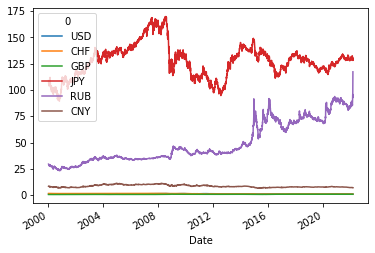

In [28]:
# taux de change
df.plot();

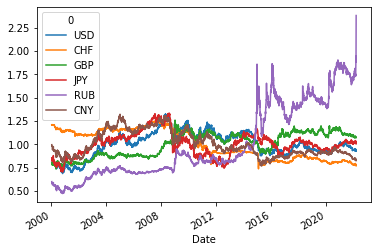

In [29]:
# taux de change divisés par leur moyenne
(df / df.mean()).plot();

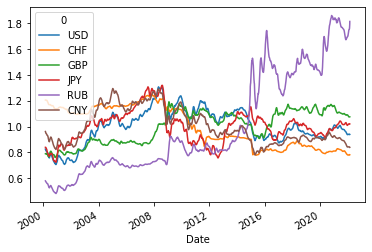

In [30]:
# taux de change divisés par leur moyenne avec une moyenne glissante de 30 jours
(df / df.mean()).rolling(30).mean().plot()
plt.show()

**Exercice n° 2**

Affichez les taux de change divisés par la dernière valeur connue avec une moyenne glissante de 30 jours.

Affichez les taux de change divisés par leur moyenne avec un maximum glissant sur 100 jours.

In [31]:
df.mean()

0
USD      1.204772
CHF      1.334316
GBP      0.777756
JPY    127.481861
RUB     49.258717
CNY      8.552220
dtype: float64

In [32]:
df.iloc[-1]

0
USD      1.1162
CHF      1.0247
GBP      0.8329
JPY    128.1500
RUB    117.2010
CNY      7.0462
Name: 2022-03-01 00:00:00, dtype: float64

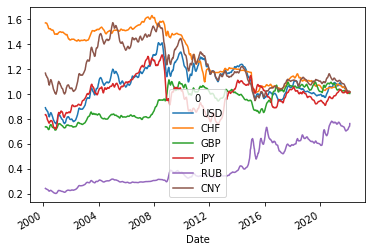

In [33]:
(df / df.iloc[-1]).rolling(30).mean().plot()
plt.show()

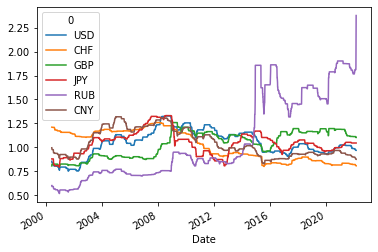

In [34]:
(df / df.mean()).rolling(100).max().plot()
plt.show()

**sparklines**

```bash
$ pip install sparklines
```

Une *sparkline* est une visualisation de données qui représente la forme générale de l'évolution d'une variable sur une ligne. La *sparkline* est en général insérée dans un texte et dans un tableau.

Source : https://fr.wikipedia.org/wiki/Sparkline

In [35]:
import sparklines

# simple API
sparkl = lambda x: sparklines.sparklines(x)[0]

sparkl(range(10))

'▁▂▃▃▄▅▆▆▇█'

In [36]:
# moyenne et tendance pour USD
(df.groupby(pd.Grouper(freq='A'))
 .agg(USD=('USD', lambda s_: s_.mean().round(3)),
      trend_USD=('USD', lambda s_: sparkl(s_.resample('Q').mean())))
)

USD trend_USD
Date                       
2000-12-31  0.920      █▅▃▁
2001-12-31  0.896      █▁▃▄
2002-12-31  0.946      ▁▃▇█
2003-12-31  1.131      ▁▅▄█
2004-12-31  1.244      ▄▁▂█
2005-12-31  1.244      █▅▃▁
2006-12-31  1.256      ▁▆▇█
2007-12-31  1.370      ▁▃▄█
2008-12-31  1.471      ▆█▆▁
2009-12-31  1.395      ▁▃▆█
2010-12-31  1.326      █▁▂▆
2011-12-31  1.392      ▃█▆▁
2012-12-31  1.285      █▅▁▆
2013-12-31  1.328      ▃▁▃█
2014-12-31  1.329      ██▅▁
2015-12-31  1.110      █▃▅▁
2016-12-31  1.107      ▄█▆▁
2017-12-31  1.130      ▁▃██
2018-12-31  1.181      █▅▃▁
2019-12-31  1.119      █▅▂▁
2020-12-31  1.142      ▁▁▆█
2021-12-31  1.183      ██▅▁
2022-12-31  1.132         ▄

In [37]:
# moyenne et tendance annuelles pour toutes les devises
year = 2021

(df.loc[str(year)]
 .pipe(lambda df_: pd.concat([df_.mean(), (df_.resample('Q')
                                           .mean()
                                           .apply(sparkl)
                                          )],
                             axis=1))
 .rename({0: 'mean', 1:'trend'}, axis=1)
 .rename_axis("devises")
)

mean trend
devises                  
USD        1.182740  ██▅▁
CHF        1.081147  ▇█▆▁
GBP        0.859604  █▅▃▁
JPY      129.876705  ▁█▄▅
RUB       87.152718  ██▅▁
CNY        7.628231  ██▅▁

In [46]:
def make(df, freq='Q'):
    return pd.concat([df.mean(), (df.resample(freq)
                                           .mean()
                                           .apply(sparkl)
                                          )],
                             axis=1)

In [48]:
(df.loc[str(year)]
 .pipe(make, 'M')
 .rename({0: 'mean', 1:'trend'}, axis=1)
 .rename_axis("devises")
)

mean         trend
devises                          
USD        1.182740  █▇▆▆█▇▅▅▅▃▂▁
CHF        1.081147  ▅▆██▇▇▆▅▆▄▂▁
GBP        0.859604  █▅▃▄▃▃▂▂▃▁▁▁
JPY      129.876705  ▁▂▄▆██▅▄▅▆▅▄
RUB       87.152718  █▇▆█▇▅▅▄▄▁▁▂
CNY        7.628231  █▇▇▇▇▇▆▅▅▄▂▁

## 2. Graphiques avec pandas

**pandas** propose une API relativement simple qui s'appuie sur **matplotlib**.

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

#### Data Names US et FR

In [50]:
# names US
def df_names_us():
    dfs = []
    for year in range(1880, 2022):
        csv = pd.read_csv(f'names/yob{year}.txt',
                          names=['name', 'gender', 'births'])
        csv['year'] = year
        dfs.append(csv)
    df = pd.concat(dfs, ignore_index=True)
    df = df[['year', 'name', 'gender', 'births']]
    return df

df_us = df_names_us()
df_us.shape

(2052781, 4)

In [52]:
df_us.head()

year       name gender  births
0  1880       Mary      F    7065
1  1880       Anna      F    2604
2  1880       Emma      F    2003
3  1880  Elizabeth      F    1939
4  1880     Minnie      F    1746

In [51]:
# names FR
def df_names_fr():
    # dict for gender
    d = {'1': 'M', '2': 'F'}
    # read table
    # no header
    # set columns
    # user converters for gender and name
    df = pd.read_csv('nat2021_csv.zip',
                      sep=';',
                      header=0,
                      names=['gender', 'name', 'year', 'births'],
                      converters={
                          'gender': d.get,
                          'name': str.title
                      })
    # select usable data
    # name with length > 1
    # year != 'XXXX'
    # name != '_Prenoms_Rares' (after use of str.title)
    df = df.loc[(df['name'].str.len() > 1)
                & (df['year'] != 'XXXX')
                & (df['name'] != '_Prenoms_Rares')]
    # set year type to int
    df['year'] = df['year'].astype(int)
    # set columns order
    df = df[['year', 'name', 'gender', 'births']]
    # sort data
    df = df.sort_values(['year', 'gender', 'births', 'name'],
                   ascending=[True, True, False, True])
    # reset index
    df = df.reset_index(drop=True)
    return df

df_fr = df_names_fr()
df_fr.shape

(648330, 4)

In [53]:
df_fr.head()

year        name gender  births
0  1900       Marie      F   48713
1  1900      Jeanne      F   13981
2  1900  Marguerite      F    8058
3  1900    Germaine      F    6981
4  1900      Louise      F    6696

**Exercice n° 3**

Combinez les 2 DataFrames en un seul DataFrame avec une colonne en plus "country" valant "us" ou "fr".

In [55]:
# add a "country" column to df_us and df_fr
df_us["country"] = "us"
df_fr["country"] = "fr"

# combine df_us and df_fr into df
df = pd.concat([df_us, df_fr]).reset_index(drop=True)
df

year       name gender  births country
0        1880       Mary      F    7065      us
1        1880       Anna      F    2604      us
2        1880       Emma      F    2003      us
3        1880  Elizabeth      F    1939      us
4        1880     Minnie      F    1746      us
...       ...        ...    ...     ...     ...
2701106  2021      Élyam      M       3      fr
2701107  2021      Énael      M       3      fr
2701108  2021       Éros      M       3      fr
2701109  2021       Étan      M       3      fr
2701110  2021   Évariste      M       3      fr

[2701111 rows x 5 columns]

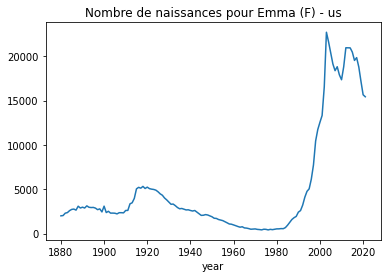

In [58]:
# exemple
tab = df.loc[(df['country'] == 'us') & (df['name'] == 'Emma') & (df['gender'] == 'F')]
tab = tab.set_index('year')
tab['births'].plot.line(title='Nombre de naissances pour Emma (F) - us');

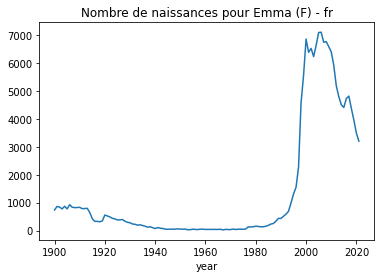

In [59]:
# exemple
tab = df.loc[(df['country'] == 'fr') & (df['name'] == 'Emma') & (df['gender'] == 'F')]
tab = tab.set_index('year')
tab['births'].plot.line(title='Nombre de naissances pour Emma (F) - fr');

In [61]:
# quelques fonctions
def select(country, name, gender):
    return df.loc[(df['country'] == country) &
                  (df['name'] == name) &
                  (df['gender'] == gender)]

def plot_names(country, name, gender):
    tab = select(country, name, gender)
    tab = tab.set_index('year')
    tab['births'].plot.line(title=f'Nombre de naissances pour {name} ({gender}) - {country}');

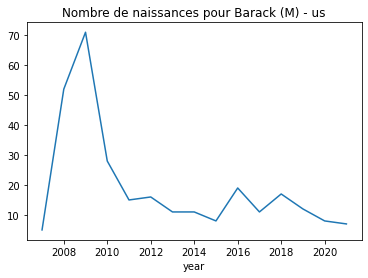

In [64]:
plot_names('us', 'Barack', 'M')

**Exercice n° 4**

Afficher l'évolution du nombre de naissances US ou FR par année et par genre.

Afficher l'évolution de la diversité des prénoms US ou FR par année et par genre.

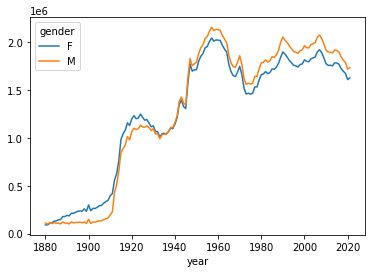

In [70]:
df_us.pivot_table(index="year", columns="gender", values="births", aggfunc="sum").plot.line();

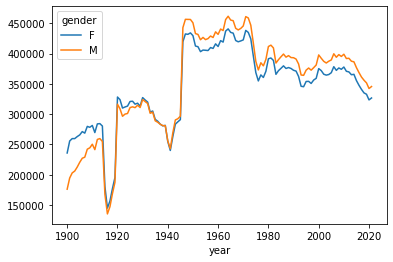

In [71]:
df_fr.pivot_table(index="year", columns="gender", values="births", aggfunc="sum").plot.line();

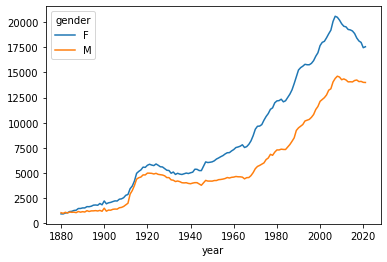

In [72]:
df_us.pivot_table(index="year", columns="gender", values="name", aggfunc="count").plot.line();

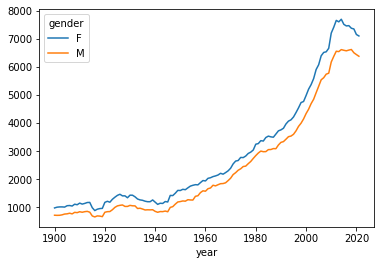

In [73]:
df_fr.pivot_table(index="year", columns="gender", values="name", aggfunc="count").plot.line();

**bar plot**

In [75]:
# sélection + pivot
top10 = ['Camille', 'Louise', 'Léa', 'Ambre', 'Agathe',
         'Louis', 'Gabriel', 'Léo', 'Maël', 'Paul']
selection = df.loc[(df['year'] == 2021) & (df['country'] == 'fr') & df['name'].isin(top10)]
tab = selection.pivot_table(values='births',
                      index='name',
                      aggfunc='sum')
tab

births
name           
Agathe     2020
Ambre      3021
Camille    2524
Gabriel    4974
Louis      3715
Louise     3768
Léa        2039
Léo        4373
Maël       3438
Paul       2291

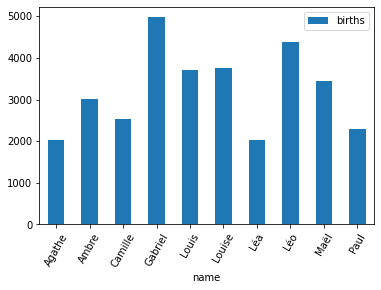

In [76]:
# bar plot
tab.plot(kind='bar', rot=60);  # testez avec barh

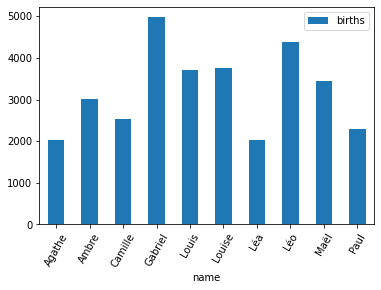

In [77]:
# bar plot
tab.plot.bar(rot=60);  # testez avec barh

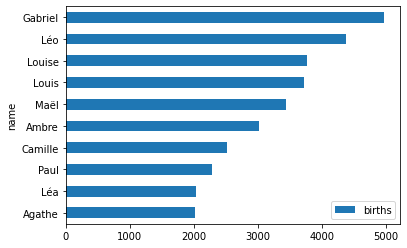

In [78]:
# barh plot
tab.sort_values('births').plot(kind='barh');  # testez avec barh

#### pie plot

In [79]:
# sélection + pivot
selection = df.loc[df['name']=='Jean']
tab = selection.pivot_table(values='births',
                            index='gender',
                            aggfunc='sum')
tab

births
gender         
F        458646
M       1937805

In [80]:
selection.groupby('gender')['births'].sum()

gender
F     458646
M    1937805
Name: births, dtype: int64

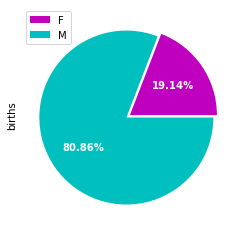

In [81]:
# pie plot
tab.plot(kind='pie',
         y='births',
         colors=['m', 'c'],
         autopct='%1.2f%%',
         textprops={'color': 'w', 'weight': 'bold'},
         explode=(0.0, 0.05));

In [82]:
pd.DataFrame.plot?

## 3. Graphiques avec matplotlib

- Objet principal : Figure
- Sous-graphiques : Axes à ne pas confondre avec les axes (axis en anglais)

Méthodes :
- `add_subplot(ligne, colonne, n° de figure)` ou 111, 121, 122, 221, 222, 223, 224... si < 10, par sous-graphique
- `subplots(nb lignes, nb colonnes)` pour tous les sous-graphiques

On utilise la sous-librairie pyplot.

Voir : https://matplotlib.org/

#### Plusieurs courbes en un grahique

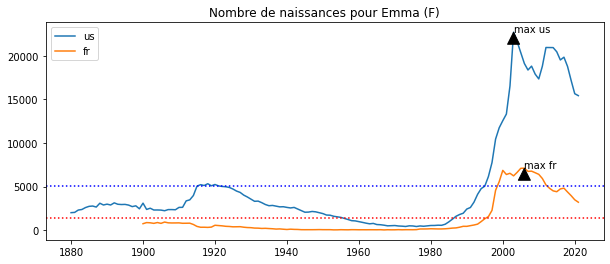

In [83]:
# plusieurs courbes en un grahique
fig = plt.figure(figsize=(10, 4))
name, gender = 'Emma', 'F'

ax1 = fig.add_subplot(111)
ax1.set_title(f'Nombre de naissances pour {name} ({gender})')

country = 'us'
tab = select(country, name, gender)
tab = tab.set_index('year')
b = tab['births']
mean_us = b.mean()
ax1.plot(b);

xmax = tab['births'].idxmax()
ymax = tab['births'].max()
ax1.annotate('max us',
             xy=(xmax, ymax),
             xytext=(xmax, ymax+50),
             arrowprops=dict(facecolor='black', shrink=0.01))

country = 'fr'
tab = select(country, name, gender)
tab = tab.set_index('year')
b = tab['births']
mean_fr = b.mean()
ax1.plot(b);

ax1.axhline(y=mean_us, color='b', ls=':')
ax1.axhline(y=mean_fr, color='r', ls=':')

xmax = tab['births'].idxmax()
ymax = tab['births'].max()
ax1.annotate('max fr',
             xy=(xmax, ymax),
             xytext=(xmax, ymax+50),
             arrowprops=dict(facecolor='black', shrink=0.01))

ax1.legend(['us', 'fr']);

#### Plusieurs grahiques avec add_subplot()

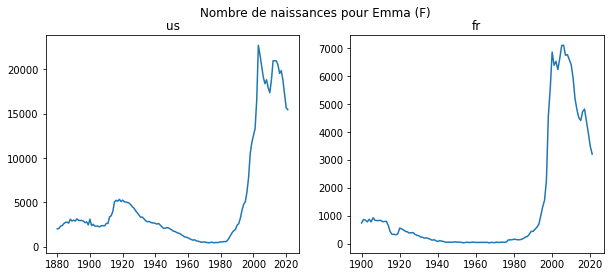

In [84]:
def plot_country_name_gender(country, name, gender, ax):
    tab = select(country, name, gender)
    tab = tab.set_index('year')
    ax.set_title(country)
    ax.plot(tab['births']);
      
fig = plt.figure(figsize=(10, 4))
name, gender = 'Emma', 'F'

fig.suptitle(f'Nombre de naissances pour {name} ({gender})')

country = 'us'
ax1 = fig.add_subplot(121)
plot_country_name_gender(country, name, gender, ax1)

country = 'fr'
ax2 = fig.add_subplot(122)
plot_country_name_gender(country, name, gender, ax2)

#### Plusieurs grahiques avec subplots()

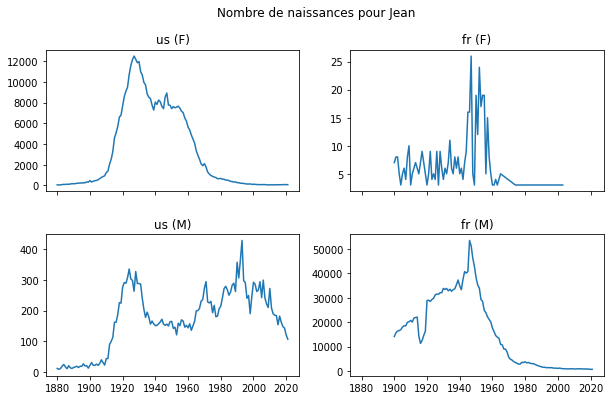

In [86]:
def plot_country_name_gender(country, name, gender, ax):
    tab = select(country, name, gender)
    tab = tab.set_index('year')
    ax.set_title(f'{country} ({gender})')
    ax.plot(tab['births']);
      
name = 'Jean'
fig = plt.figure(figsize=(10, 6))
fig.suptitle(f'Nombre de naissances pour {name}')
# tableau lignes x colonnes
[[ax1, ax2], [ax3, ax4]] = fig.subplots(2, 2, sharex=True)  #, sharey=True)
fig.subplots_adjust(hspace=0.3)  # séparation verticale

plot_country_name_gender('us', name, 'F', ax1)
plot_country_name_gender('fr', name, 'F', ax2)
plot_country_name_gender('us', name, 'M', ax3)
plot_country_name_gender('fr', name, 'M', ax4)

In [ ]:
#plt.Axes.plot?

> plot(x, y, color='green', marker='o', linestyle='dashed',
> ...      linewidth=2, markersize=12)

Dans **matplotlib** il y a :
- 4 types de lignes: '-' (solid), '--' (dashed), ':' (dotted), '-.' (dashdotted)
- plusieurs referentiels de couleurs :
    - 8 couleurs basiques : 'b' (blue), 'c' (cyan), 'g' (green), 'k' (black), 'm' (magenta), 'r' (red), 'w' (white) and 'y' (yellow)
    - niveaux de gris : nombres sous forme de chaines entre '0.0' (noir) et '1.0' (blanc)
    - 148 couleurs nommées : voir la variable matplotlib.colors.cnames
    - 16+ millions de couleurs RVB en hexadecimal: #xxyyzz
- 41 marqueurs : see variable matplotlib.lines.Line2D.markers
- linewidth peut être remplacé par lw
- linestyle peut être remplacé par ls

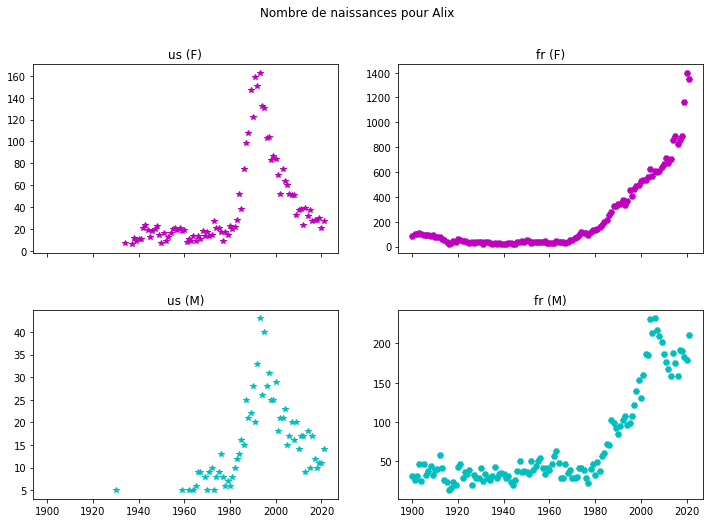

In [87]:
def plot_country_name_gender(country, name, gender, ax):
    tab = select(country, name, gender)
    tab = tab.set_index('year')
    ax.set_title(f'{country} ({gender})')
    ax.plot(tab['births'],
            '*' if country=='us' else 'H',
            color='m' if gender=='F' else 'c');
      
name = 'Alix'
fig = plt.figure(figsize=(12, 8))
fig.suptitle(f'Nombre de naissances pour {name}')
# tableau lignes x colonnes
[[ax1, ax2], [ax3, ax4]] = fig.subplots(2, 2, sharex=True)
fig.subplots_adjust(hspace=0.3)  # séparation verticale

plot_country_name_gender('us', name, 'F', ax1)
plot_country_name_gender('fr', name, 'F', ax2)
plot_country_name_gender('us', name, 'M', ax3)
plot_country_name_gender('fr', name, 'M', ax4)

#### bar plot customisé

In [88]:
# sélection + pivot
top10 = ['Camille', 'Louise', 'Léa', 'Ambre', 'Agathe',
         'Louis', 'Gabriel', 'Léo', 'Maël', 'Paul']
selection = df.loc[(df['year'] == 2020) & (df['country'] == 'fr') & df['name'].isin(top10)]
tab = selection.pivot_table(values='births',
                      index='name',
                      aggfunc='sum')
tab

births
name           
Agathe     1925
Ambre      2753
Camille    2570
Gabriel    4420
Louis      3794
Louise     3809
Léa        2432
Léo        4507
Maël       3311
Paul       2475

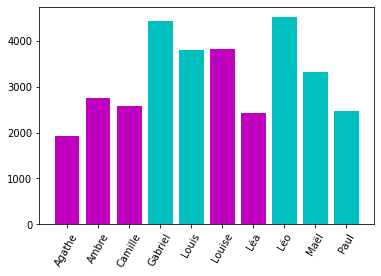

In [89]:
# bar plot
plt.bar(x=tab.index, height=tab['births'], color=list('mmmccmmccc'));  # testez avec barh
plt.xticks(rotation=60);

## 3. Graphiques avec seaborn

Extension de **matplotlib** orientée statistiques.

Voir : https://seaborn.pydata.org/api.html

In [90]:
# import
import seaborn as sns

#### countplot

Show the counts of observations in each categorical bin using bars.

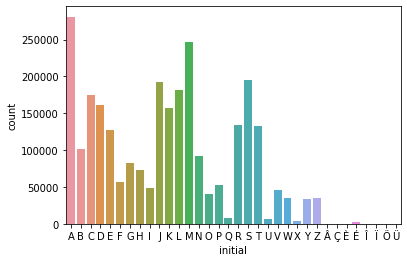

In [91]:
# countplot
df['initial'] = df['name'].str[0]
df = df.sort_values('initial')
sns.countplot(data=df, x='initial');

#### barplot

Show point estimates and confidence intervals as rectangular bars.

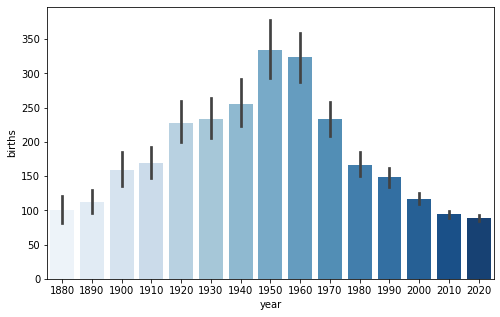

In [92]:
# seaborn barplot with births for decades
plt.figure(figsize=(8, 5))
var = df.loc[df['year'] % 10 == 0]
sns.barplot(data=var, x='year', y='births', palette='Blues');

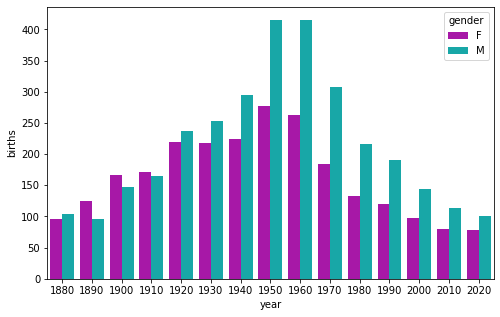

In [93]:
# seaborn barplot with births for decades + hue
plt.figure(figsize=(8, 5))
var = df.loc[df['year'] % 10 == 0]
sns.barplot(data=var, x='year', y='births', hue='gender', palette=['m', 'c'], ci=None);

In [94]:
df.groupby('year').mean(numeric_only=True).loc[1950]

births    334.171659
Name: 1950, dtype: float64

#### displot

Flexibly plot a univariate distribution of observations.

In [95]:
# list of names which appear at least 10,000 times
var = df.pivot_table(index='name', values='births', aggfunc='sum')
var = var.loc[var['births'] >= 10_000]
names10000 = var.index

# data for names which appear at least 10,000 times
df10000 = df.loc[df['name'].isin(names10000)]
print(len(df10000))

# number of births by gender, and ratio F / (F + M)
var = df10000.pivot_table(index='name',
                          columns='gender',
                          values='births',
                          aggfunc='sum')
ratio = var['F'] / (var['F'] + var['M'])
ratio

585164


name
Aaliyah     0.999004
Aaron       0.006917
Abbey       0.997993
Abbie       0.985267
Abbigail    0.999581
              ...   
Zoey        0.997835
Zoie             NaN
Zora        0.998044
Zoé         0.994995
Zuri        0.946094
Length: 3266, dtype: float64

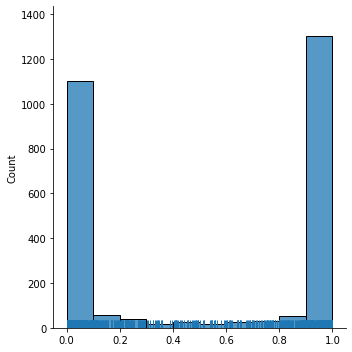

In [96]:
# seaborn distplot
var = df.loc[df['year'] % 10 == 0]
sns.displot(ratio, kde=False, rug=True, bins=10);

#### regplot

Plot data and a linear regression model fit.

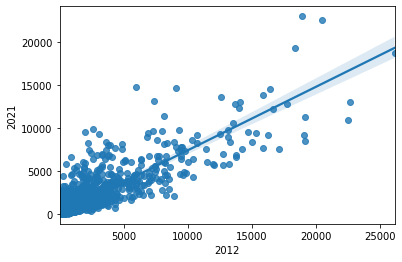

In [97]:
# select years year1 and year2
year1 = 2012
year2 = 2021
var = df.loc[df["year"].isin([year1, year2])]
var = var.pivot_table(values="births",
                      index="name",
                      columns="year",
                      aggfunc='sum')
sns.regplot(x=var[year1], y=var[year2]);

In [ ]:
var.max()

In [98]:
from scipy.stats import linregress

var = var.dropna()
print(linregress(var[2012].values, var[2021].values))

LinregressResult(slope=0.736330947531113, intercept=27.851462655248966, rvalue=0.8846735710630612, pvalue=0.0, stderr=0.0023417365948096725, intercept_stderr=1.989588697256698)


In [ ]:
slope, intercept, *_ = linregress(var[2012].values, var[2021].values)
slope, intercept

In [ ]:
slope, intercept, _, _, _ = linregress(var[2012].values, var[2021].values)
slope, intercept

#### stripplot

Draw a scatterplot where one variable is categorical.

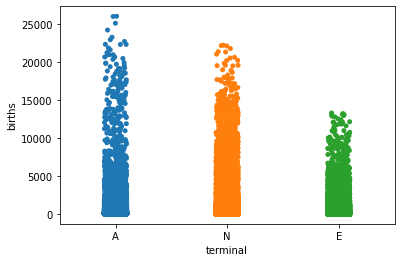

In [99]:
# stripplot horizontal
df['terminal'] = df['name'].str[-1].str.upper()
letters = list('AEN')
var = df.loc[df['terminal'].isin(letters) & (df['year'] > 2000) & (df['country'] == 'us')]
sns.stripplot(data=var, x='terminal', y='births');

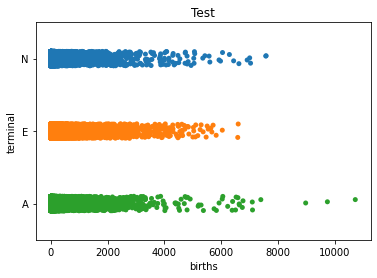

In [100]:
# stripplot vertical
var = df.loc[df['terminal'].isin(letters) & (df['year'] > 2000) & (df['country'] == 'fr')]
ax = sns.stripplot(data=var, y='terminal', x='births');
ax.set_title('Test');

#### heatmap

Plot rectangular data as a color-encoded matrix.

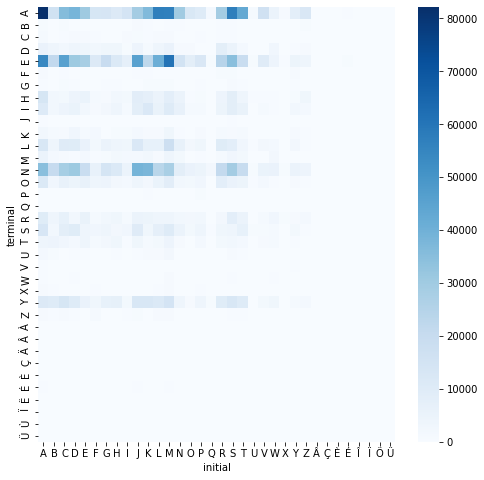

In [103]:
# heatmap
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.heatmap(pd.crosstab(df['terminal'], df['initial']), cmap='Blues', ax=ax);

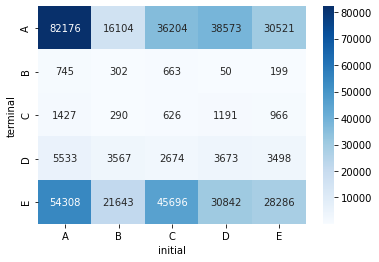

In [106]:
tab = pd.crosstab(df['terminal'], df['initial']).iloc[:5, :5]
sns.heatmap(tab, cmap='Blues', annot=True, fmt='d');

## 5. Cartes : maplotlib, plotly, ipyleaflet

### 5.1 Cartes naives avec matplotlib

In [107]:
# communes de France

df = pd.read_csv('correspondance-code-insee-code-postal.csv',
                sep=';')
df[['Latitude', 'Longitude']] = df['geo_point_2d'].str.extract('(.*), (.*)').astype(float)
df.shape

(36742, 19)

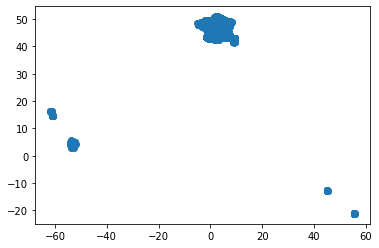

In [108]:
# carte naive
plt.scatter(df['Longitude'], df['Latitude']);

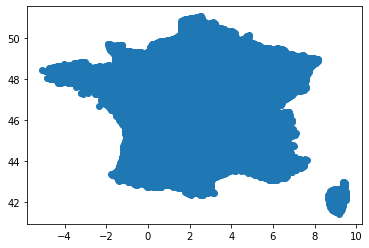

In [109]:
# métro : projection cylindrique équidistante vs Mercator
metro = df.loc[df['Latitude'] > 40]
plt.scatter(metro['Longitude'], metro['Latitude']);

Prise en compte du relief.

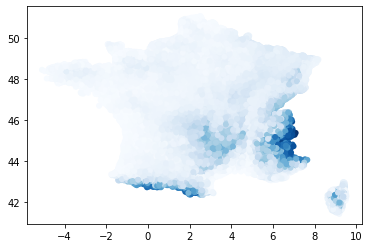

In [110]:
# nuancier bleu
plt.scatter(metro["Longitude"],
            metro["Latitude"],
            c=metro["Altitude Moyenne"],
            cmap=plt.cm.Blues,
            edgecolors='none');

Avec tri des altitudes.

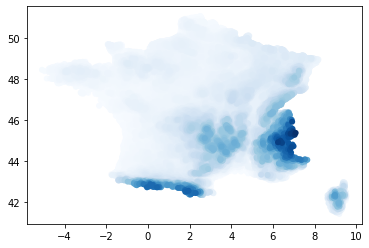

In [111]:
# nuancier bleu avec tri des valeurs
metro = metro.sort_values("Altitude Moyenne")
plt.scatter(metro["Longitude"],
            metro["Latitude"],
            c=metro["Altitude Moyenne"],
            cmap=plt.cm.Blues,
            edgecolors='none');

Avec une autre palette de couleur et une colorbar.

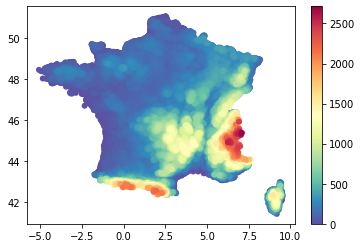

In [112]:
# on utilise plt.cm.Spectral_r
var = plt.scatter(x=metro["Longitude"],
            y=metro["Latitude"],
            c=metro["Altitude Moyenne"],
            cmap=plt.cm.Spectral_r,
            edgecolors='none')
plt.colorbar(var);

**Remarque**

Il existe dans **matplotlib** (et **seaborn**) un système de palettes de couleurs :

- matplotlib : https://matplotlib.org/stable/tutorials/colors/colormaps.html

- seaborn : http://seaborn.pydata.org/tutorial/color_palettes.html

Les librairies gèrent également :

- Les palettes de couleurs de **ColorBrewer** : http://colorbrewer2.org

- Les 954 couleurs nommées de manière participative par l'initiative **xkcd** : https://xkcd.com/color/rgb/ Voir également le blog : https://blog.xkcd.com/2010/05/03/color-survey-results/

### 5.2 Cartes avec plotly

**Plotly** Python Open Source Graphing Library

**Plotly**'s Python graphing library makes interactive, publication-quality graphs.

Voir : https://plotly.com/python/

La société canadienne plotly édite également la librairie **dash**.

Voir : https://plotly.com/dash/

In [113]:
# import
from plotly.offline import iplot
import colorlover as cl

# init if needed
# from plotly.offline import init_notebook_mode
# init_notebook_mode(connected=True)

In [114]:
# pays
var = pd.read_html('https://www.geonames.org/countries/',
                   header=0,
                   keep_default_na=False)  # NA = North America
df = var[1]
df.shape

(250, 9)

In [115]:
df.head()

ISO-3166alpha2 ISO-3166alpha3  ISO-3166numeric fips               Country  \
0             AD            AND               20   AN               Andorra   
1             AE            ARE              784   AE  United Arab Emirates   
2             AF            AFG                4   AF           Afghanistan   
3             AG            ATG               28   AC   Antigua and Barbuda   
4             AI            AIA              660   AV              Anguilla   

            Capital  Area in km²  Population Continent  
0  Andorra la Vella        468.0       77006        EU  
1         Abu Dhabi      82880.0     9630959        AS  
2             Kabul     647500.0    37172386        AS  
3        St. John's        443.0       96286        NA  
4        The Valley        102.0       13254        NA

Carte mondiale : programmation déclarative

In [116]:
# carte mondiale
data = [{
        'type': 'choropleth',
        'locations': df['ISO-3166alpha3'],
        'z': df['Population'],
        'text': df['Country'],
        'colorscale': list(zip(np.linspace(0, 1, 9), cl.scales['9']['seq']['Reds'])),
        'autocolorscale': False,
        'reversescale': False,
        'marker': {
            'line': {
                'color': 'rgb(180,180,180)',
                'width': 0.5
            }},
        'colorbar':
            {'autotick': False,
            'title': 'Population'},
        }]

layout = {
    'title': '<br>Source:\
            <a href="https://www.geonames.org/countries/">\
            geonames</a>',
    'geo': {
        'showcountries': True,
        'showframe': False,
        'showcoastlines': False,
        'projection': {
            'type': 'natural earth'  # 'natural earth'
        }
    }
}


fig = {'data': data, 'layout': layout}
iplot(fig, validate=False, filename='d3-world-map')

**Exercice n° 5**

- Ajoutez une colonne 'Densité'
- Affichez la densité en niveaux de bleus (cherchez une correction des données pour obtenir un affichage pertinent).
- Prenez une projection aléatoire parmi : 'equirectangular', 'mercator', 'orthographic', 'natural earth', 'kavrayskiy7', 'miller', 'robinson', 'eckert4', 'azimuthal equal area', 'azimuthal equidistant', 'conic equal area', 'conic conformal', 'conic equidistant', 'gnomonic', 'stereographic', 'mollweide', 'hammer', 'transverse mercator' en utilisant numpy.random.choice()

In [117]:
df["Densité"] = df["Population"] / df["Area in km²"]
df.head()

ISO-3166alpha2 ISO-3166alpha3  ISO-3166numeric fips               Country  \
0             AD            AND               20   AN               Andorra   
1             AE            ARE              784   AE  United Arab Emirates   
2             AF            AFG                4   AF           Afghanistan   
3             AG            ATG               28   AC   Antigua and Barbuda   
4             AI            AIA              660   AV              Anguilla   

            Capital  Area in km²  Population Continent     Densité  
0  Andorra la Vella        468.0       77006        EU  164.542735  
1         Abu Dhabi      82880.0     9630959        AS  116.203656  
2             Kabul     647500.0    37172386        AS   57.409090  
3        St. John's        443.0       96286        NA  217.349887  
4        The Valley        102.0       13254        NA  129.941176

In [125]:
# carte mondiale
data = [{
        'type': 'choropleth',
        'locations': df['ISO-3166alpha3'],
        'z': df['Densité'].clip(None, 500),
        'text': df['Country'],
        'colorscale': list(zip(np.linspace(0, 1, 9), cl.scales['9']['seq']['Blues'])),
        'autocolorscale': False,
        'reversescale': False,
        'marker': {
            'line': {
                'color': 'rgb(180,180,180)',
                'width': 0.5
            }},
        'colorbar':
            {'autotick': False,
            'title': 'Population'},
        }]

layout = {
    'title': '<br>Source:\
            <a href="https://www.geonames.org/countries/">\
            geonames</a>',
    'geo': {
        'showcountries': True,
        'showframe': False,
        'showcoastlines': False,
        'projection': {
            'type': 'orthographic'  # 'natural earth'
        }
    }
}


fig = {'data': data, 'layout': layout}
iplot(fig, validate=False, filename='d3-world-map')

### Cartes choroplèthes

Pour produire une carte choroplèthe, il faut récupérer un fichier *geojson* de la partie du monde considérée. Ce fichier contient entre autres 2 informations importantes :
- Une clé qui désigne chaque sous-région,
- La description d'un polygone ou d'un multi-polygones sous la forme d'une liste de coordonnées (latitudes et longitudes),

Il faut ensuite faire correspondre les valeurs de la colonne du DataFrame qui contient les données relatives à chaque sous-région avec celles de la clé du fichier *geojson*.

Il est possible ensuite d'utiliser différents fonds de cartes et différents nuanciers.

Le fichier "departements.geojson" utilisé ci-après provient du site : https://france-geojson.gregoiredavid.fr/ et il faut analyser le fichier pour trouver la clé correspondant à chaque sous-région.

In [127]:
import json

with open("departements.geojson") as f:
    departements = json.loads(f.read())

In [128]:
# liste des valeurs de la clé "code"
codes = sorted([f["properties"]["code"] for f in departements["features"]])
print(*codes)

01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 21 22 23 24 25 26 27 28 29 2A 2B 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95


In [129]:
# dataset 
geo = pd.read_csv("correspondance-code-insee-code-postal.csv",
                 sep=";",
                 )

geo.head()

Code INSEE Code Postal               Commune    Département  \
0      31080       31350    BOULOGNE-SUR-GESSE  HAUTE-GARONNE   
1      11143       11510               FEUILLA           AUDE   
2      43028       43200            BESSAMOREL    HAUTE-LOIRE   
3      78506       78660    PRUNAY-EN-YVELINES       YVELINES   
4      84081       84310  MORIERES-LES-AVIGNON       VAUCLUSE   

                       Région            Statut  Altitude Moyenne  Superficie  \
0               MIDI-PYRENEES  Chef-lieu canton             301.0      2470.0   
1        LANGUEDOC-ROUSSILLON    Commune simple             314.0      2426.0   
2                    AUVERGNE    Commune simple             888.0       743.0   
3               ILE-DE-FRANCE    Commune simple             155.0      2717.0   
4  PROVENCE-ALPES-COTE D'AZUR    Commune simple              49.0      1042.0   

   Population                   geo_point_2d  \
0         1.6  43.2904403081, 0.650641474176   
1         0.1   42.9291375888, 2.90138923544   
2         0.4   45.1306448726, 4.07952494849   
3         0.8   48.5267627187, 1.80513972814   
4         7.6   43.9337788848, 4.90875878315   

                                           geo_shape  ID Geogla  Code Commune  \
0  {"type": "Polygon", "coordinates": [[[0.671852...       5761            80   
1  {"type": "Polygon", "coordinates": [[[2.906996...       3869           143   
2  {"type": "Polygon", "coordinates": [[[4.091674...       5894            28   
3  {"type": "Polygon", "coordinates": [[[1.829610...      25381           506   
4  {"type": "Polygon", "coordinates": [[[4.927176...      29013            81   

   Code Canton  Code Arrondissement Code Département  Code Région  
0            6                    2               31           73  
1           30                    3               11           91  
2           29                    3               43           83  
3           19                    2               78           11  
4           23                    2               84           93

In [130]:
# population des départements
df = (geo.groupby("Code Département", as_index=False)["Population"]
      .sum()
     )

df.head()

Code Département  Population
0               01       588.8
1               02       541.4
2               03       343.3
3               04       159.0
4               05       135.3

In [131]:
# import
import plotly.express as px

In [132]:
# choropleth_mapbox
px.choropleth_mapbox(data_frame=df,
                     geojson=departements,
                     locations='Code Département',  # clé dans le DataFrame
                     color='Population',
                     featureidkey='properties.code',  # accès à la clé dans le fichier geojson
                     color_continuous_scale="teal",
                     mapbox_style="carto-positron",
                     zoom=4.0,
                     center = {"lat": 47.0, "lon": 0.0},
                     opacity=0.5,
                     labels={'Population': 'Population en milliers'}
                    )

**Documentation**

- Plotly Express : https://plotly.com/python/plotly-express/
- Built-in Continuous Color Scales : https://plotly.com/python/builtin-colorscales/
- Mapbox Map Layers : https://plotly.com/python/mapbox-layers/

### 5.3 Geocoding avec geopy et cartes avec ipyleaflet

**ipyleaflet** provides interactive maps in the Jupyter notebook based on leaflet.js JavaScript library and OpenStreetMap.

Installation (in a shell):

```bash
$ conda install -c conda-forge geopy OU $ pip install geopy

$ conda install -c conda-forge ipyleaflet OU $ pip install ipyleaflet

$ jupyter nbextension enable --py --sys-prefix ipyleaflet
```

**geopy** : informations sur une adresse physique.

Voir : https://geopy.readthedocs.io/en/stable/index.html

In [133]:
# mandatory if Python ssl.SSLError occurs
#import ssl
#import certifi
#ctx = ssl.create_default_context(cafile=certifi.where())
#geopy.geocoders.options.default_ssl_context = ctx
#import geopy

from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='telecom_paris', timeout=7)
location = geolocator.geocode('19 Place Marguerite Perey, 91120 Palaiseau, France')
location.raw

{'place_id': 346057888,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'relation',
 'osm_id': 9903423,
 'boundingbox': ['48.7123423', '48.7134647', '2.1988453', '2.2015918'],
 'lat': '48.7129116',
 'lon': '2.1998893037725673',
 'display_name': 'Télécom Paris, 19, Place Marguerite Perey, La Vauve - École Polytechnique, Campus Urbain de Paris-Saclay, Palaiseau, Essonne, Île-de-France, France métropolitaine, 91120, France',
 'class': 'building',
 'type': 'yes',
 'importance': 1.1725057412006172}

In [134]:
# get latitude and longitude
lat, lon = location.raw['lat'], location.raw['lon']
lat, lon

('48.7129116', '2.1998893037725673')

**Plan**

In [135]:
# demo
from ipyleaflet import Map

# map arround 48.71, 2.20
m = Map(center=(lat, lon), zoom=18)
m

Map(center=['48.7129116', '2.1998893037725673'], controls=(ZoomControl(options=['position', 'zoom_in_text', 'z…

**Image satellite**

In [141]:
# satellite map
from datetime import datetime, timedelta
from ipyleaflet import basemaps, basemap_to_tiles

# satellite map for yesterday
# NASA's Global Imagery Browse Services
yesterday = datetime.now() - timedelta(days=14)
nasa = basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, yesterday.strftime('%Y-%m-%d'))
m = Map(layers=(nasa, ), center=(lat, lon), zoom=8)

m

Map(center=['48.7129116', '2.1998893037725673'], controls=(ZoomControl(options=['position', 'zoom_in_text', 'z…

**Autre carte...**

In [142]:
# villes
df = pd.read_csv('cities500.zip',
                 sep='\t',header=None,
                 keep_default_na=False,  # NA = North America
                 na_values=['', -9999],
                 names=['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 
                        'longitude', 'feature class', 'feature code', 'country code',
                        'cc2', 'admin1 code', 'admin2 code', 'admin3 code', 'admin4 code',
                        'population', 'elevation', 'dem', 'timezone', 'modification date'],
                        dtype={'admin1 code': str,
                               'admin2 code': str,
                               'admin3 code': str,
                               'admin4 code': str})
df.shape

(199301, 19)

In [143]:
# map with markers

from ipyleaflet import Marker, LayerGroup

watercolor = basemap_to_tiles(basemaps.Stamen.Watercolor)
m = Map(layers=(watercolor, ), center=(50, 50), zoom=1)

# add markers for cities with population >= 3M
df2 = df.loc[df['population'] >= 3e6]
layers = []
for i, row in df2.iterrows():
    marker = Marker(location=(row['latitude'], row['longitude']),
                    draggable=False,
                    title=row['name'])
    layers.append(marker)
layer_group = LayerGroup(layers=layers)
m.add_layer(layer_group)

m

Map(center=[50, 50], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…